In [1]:
import tensorflow as tf
from keras.datasets import cifar10
from keras import layers,models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(10)
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [6]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('acc')>=0.90):
            print('\n Reached 90% accuracy!')
            self.model.stop_training=True
            
callbacks=mycallback() 

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks = [callbacks])

Epoch 1/20
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5039 - acc: 0.4481 - val_loss: 1.2401 - val_acc: 0.5502
Epoch 2/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1308 - acc: 0.5997 - val_loss: 1.0463 - val_acc: 0.6307
Epoch 3/20
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9693 - acc: 0.6573 - val_loss: 0.9811 - val_acc: 0.6530
Epoch 4/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8672 - acc: 0.6951 - val_loss: 0.9057 - val_acc: 0.6877
Epoch 5/20
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7858 - acc: 0.7224 - val_loss: 0.8890 - val_acc: 0.6930
Epoch 6/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7179 - acc: 0.7473 - val_loss: 0.9114 - val_acc: 0.6940
Epoch 7/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6674 - acc: 0.7638 - val_loss: 0.8369 - val_acc: 0.7171
Epoch 8/20
1563/1563 [==========================

Text(0.5, 1.0, 'Training and validation loss')

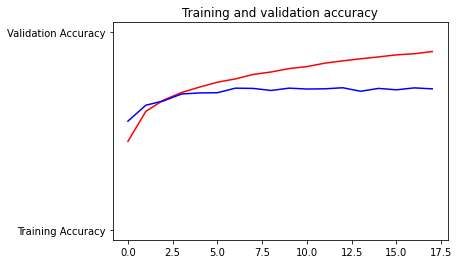

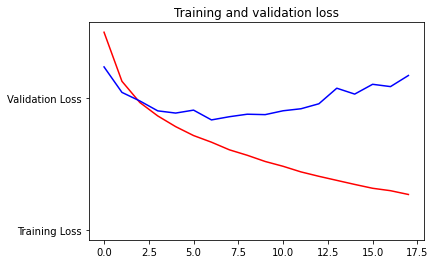

In [8]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
